## Position processor data analysis and visualization 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

### Scatter plots 

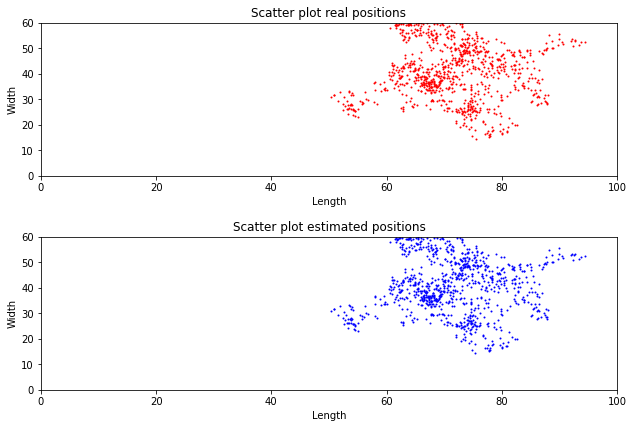

In [29]:
fig, axs = plt.subplots(2, figsize=(10, 6))

pos=np.loadtxt('p_original')
loc=np.loadtxt('p_xy')
for i in range (2):
    ax=axs[i]
    ax.set_xlim((0,100))
    ax.set_ylim((0,60))
    ax.set_ylabel('Width')
    ax.set_xlabel('Length')
    #ax.set_aspect(1.0)
    #select all y and z values in a given x segment
    if i==0:
        ax.scatter(pos[:,0], pos[:, 1],s=1,c='r')
        ax.set_title('Scatter plot real positions')
    else:
        ax.scatter(loc[:,0], loc[:, 1],s=1,c='b')
        ax.set_title('Scatter plot estimated positions')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.95, 
                    wspace=0.2, 
                    hspace=0.4)        
plt.show()

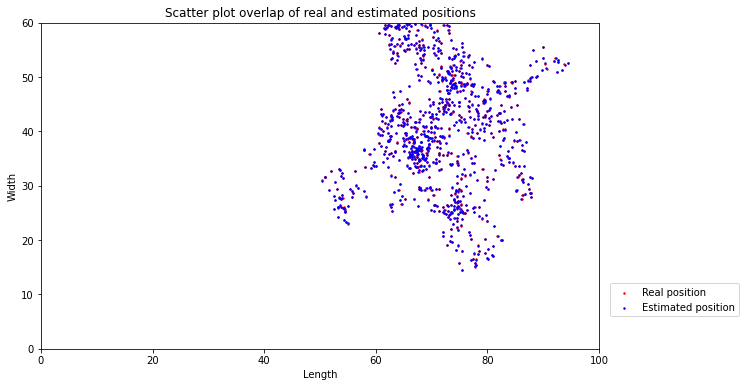

In [30]:
fig, axs = plt.subplots(1, figsize=(10, 6))

axs.set_xlim((0,100))
axs.set_ylim((0,60))
axs.set_ylabel('Width')
axs.set_xlabel('Length')

axs.scatter(pos[:,0], pos[:, 1],label="Real position", s=2,c='r')
axs.scatter(loc[:,0], loc[:, 1],label="Estimated position", s=2,c='b')
axs.set_title('Scatter plot overlap of real and estimated positions')

plt.legend(bbox_to_anchor=(1.02, 0.1), loc='lower left', borderaxespad=0)
plt.show()

In [45]:
n=int(np.size(loc)/2)
time=np.arange(1,n+1)
err_pos=np.zeros(n)

err_pos=abs(np.sqrt((pos[:,0]-loc[:,0])**2+(pos[:,1]-loc[:,1])**2))
#print(err_pos)

errx_mean=np.sum(abs(pos[:,0]-loc[:,0]))/n
print('errx_mean=',round(errx_mean,2))

errx_rms=np.sqrt(np.sum((pos[:,0]-loc[:,0])**2)/n)
print('errx_rms=',round(errx_rms,2))

erry_mean=np.sum(abs(pos[:,1]-loc[:,1]))/n
print('erry_mean=',round(erry_mean,2))

erry_rms=np.sqrt(np.sum((pos[:,1]-loc[:,1])**2)/n)
print('erry_rms=', round(erry_rms,2))

err_mean=np.sum(err_pos)/n
print('err_mean=',round(err_mean,2))

err_rms=np.sqrt(np.sum((pos[:,0]-loc[:,0])**2+(pos[:,1]-loc[:,1])**2)/n)
print('err_rms=', round(err_rms,2))

print('Positional accuracy=',round(np.count_nonzero(err_pos < 0.3)*100/n,2),'%')


errx_mean= 0.02
errx_rms= 0.03
erry_mean= 0.03
erry_rms= 0.04
err_mean= 0.04
err_rms= 0.05
Positional accuracy= 98.33 %


## Error in estimation

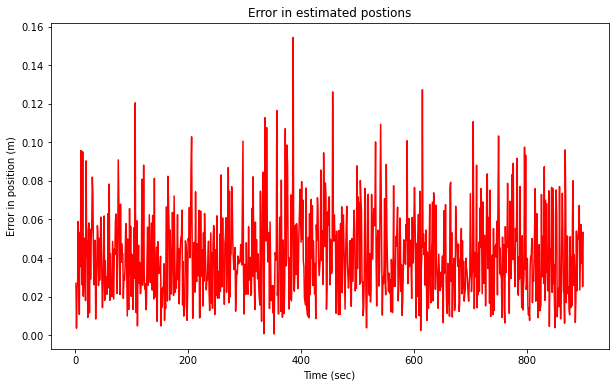

In [32]:
fig, axs = plt.subplots(1, figsize=(10, 6))

axs.set_ylabel('Error in position (m)')
axs.set_xlabel('Time (sec)')
axs.set_title('Error in estimated postions')

axs.plot(time,err_pos,c='r')
    
plt.show()

In [33]:
p=[50,30]
pos=np.row_stack((p,pos))
loc=np.row_stack((p,loc))
l=np.size(pos)/2
n=np.size(loc)/2
print(l,n)


901.0 901.0


In [34]:
n=int(np.size(loc)/2)

vep=np.zeros(n-1)
vep_fil=np.zeros(n-1)
vel=np.zeros(n-1)
vel_fil=np.zeros(n-1)

for j in range(1,n-1):
    vep[j-1]=abs(np.sqrt((pos[j,0]-pos[j-1,0])**2+(pos[j,1]-pos[j-1,1])**2))
    vel[j-1]=abs(np.sqrt((loc[j,0]-loc[j-1,0])**2+(loc[j,1]-loc[j-1,1])**2))

vep_fil[:]=vep[:]
vel_fil[:]=vel[:]
for j in range(10,n-12):
    vep_fil[j]=np.mean(vep[j-10:j+10]**2)
    vel_fil[j]=np.mean(vep[j-10:j+10]**2)

#print(np.size(vep_fil))

err_vel=np.zeros(n)

err_vel=abs(vel[:]-vep[:])
#print(err_pos)

errv_mean=np.sum(err_vel)/n
print('errv_mean=',round(errv_mean,2))

errv_rms=np.sqrt(np.sum(err_vel[:]**2)/n)
print('errv_rms=',round(errv_rms, 2))


errv_mean= 0.04
errv_rms= 0.05


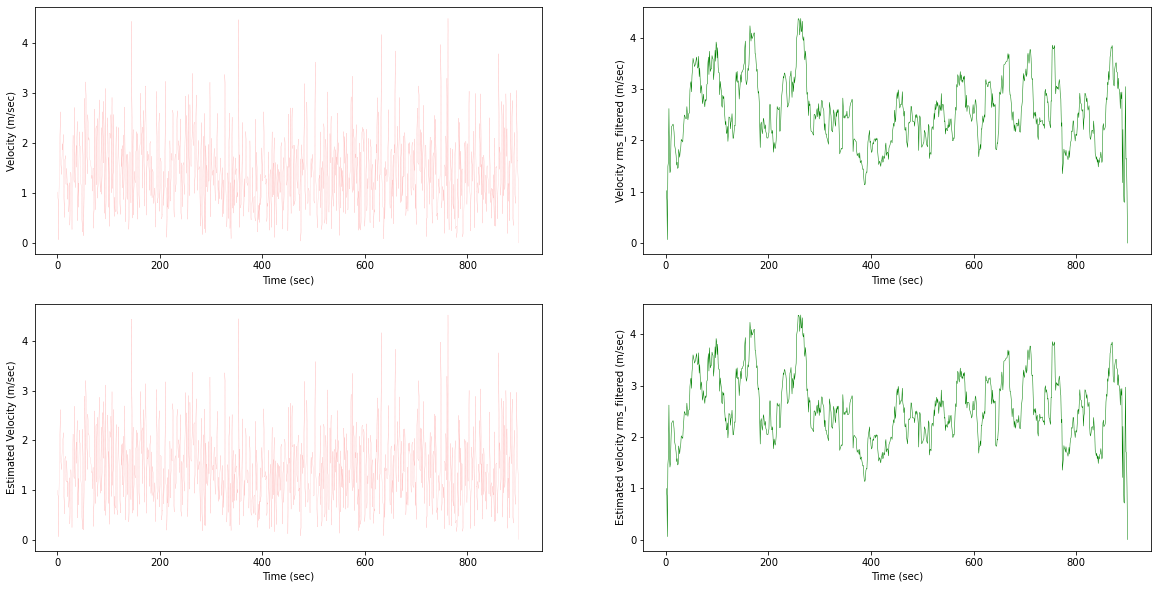

In [35]:
fig, axs = plt.subplots(2,2, figsize=(20, 10))

pos=np.loadtxt('p_original')
loc=np.loadtxt('p_xy')

for i in range (2):
    ax=axs[i//2, i%2]
    
    #select all y and z values in a given x segment
    if i==0:
        ax=axs[i, i]
        ax.plot(time,vep,c='r',linestyle='--', linewidth=0.1)
        ax.set_ylabel('Velocity (m/sec)')
        ax.set_xlabel('Time (sec)')
        ax=axs[i, i+1]
        ax.plot(time,vep_fil, c='g', linewidth=0.5)
        ax.set_ylabel('Velocity rms_filtered (m/sec)')
        ax.set_xlabel('Time (sec)')
    else:
        ax=axs[i, i-1]
        ax.plot(time,vel,c='r',linestyle='--', linewidth=0.1)
        ax.set_ylabel('Estimated Velocity (m/sec)')
        ax.set_xlabel('Time (sec)')
        ax=axs[i, i]
        ax.plot(time,vel_fil, c='g', linewidth=0.5)
        ax.set_ylabel('Estimated velocity rms_filtered (m/sec)')
        ax.set_xlabel('Time (sec)')
plt.show()

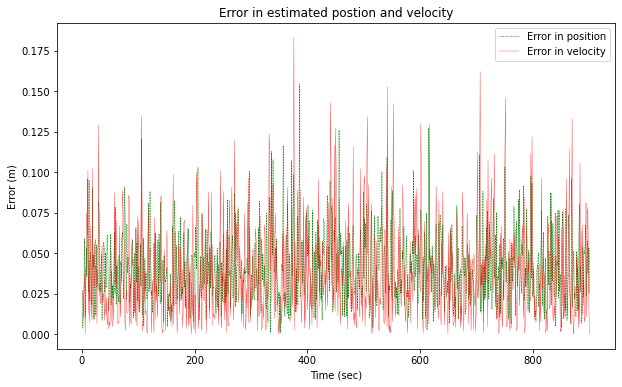

In [36]:
fig, axs = plt.subplots(1, figsize=(10, 6))

axs.plot(time,err_pos,c='g', linestyle='--', label="Error in position", linewidth=0.5)
axs.plot(time,err_vel,c='r',label="Error in velocity", linewidth=0.3)

axs.set_ylabel('Error (m)')
axs.set_xlabel('Time (sec)')
axs.set_title('Error in estimated postion and velocity')

plt.legend()   
plt.show()

## Probabilty density distributions of error

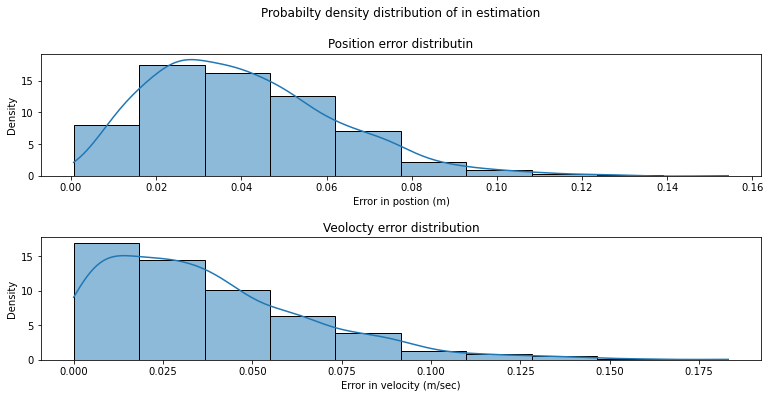

In [37]:
fig, axs = plt.subplots(2, figsize=(10, 5))
fig.suptitle('Probabilty density distribution of in estimation')

sns.histplot(data=err_pos, bins=10, stat="density", kde=True, ax=axs[0])
axs[0].set_xlabel('Error in postion (m)')
axs[0].set_title('Position error distributin')


sns.histplot(data=err_vel, bins=10, stat="density", kde=True, ax=axs[1])
axs[1].set_xlabel('Error in velocity (m/sec)')
axs[1].set_title('Veolocty error distribution')

plt.subplots_adjust(left=0,
                    bottom=0, 
                    right=1, 
                    top=0.85, 
                    wspace=0, 
                    hspace=0.5) 

plt.show()

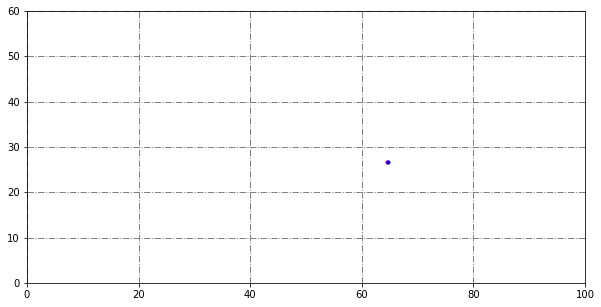

In [38]:
fig, axs = plt.subplots(figsize=(10, 5))

def animate(t):
    fig.clear()
    ax = fig.add_subplot(111)
    ax.set_xlim((0,100))
    ax.set_ylim((0,60))
    ax.scatter(pos[t,0], pos[t, 1],s=10,c='r')
    ax.scatter(loc[t,0], loc[t, 1],s=10,c='b')
    plt.grid(True, color = "grey", linewidth = "1", linestyle = "-.")

ani = animation.FuncAnimation(fig, animate, interval=0.1, frames=range(0,n-1,10))

ani.save('animation.gif', writer='pillow')  